# Нейронные сети

In [1]:
import numpy as np

## Математическая модель нейрона Мак-Коллака - Питтса

<img src="nn_assets/neuron_math_model.png" width=800>
<img src="nn_assets/1_neuron.png" width="800">

## Фукнции активации

<img src="nn_assets/activation_functions.png" width="800">

Sigmoid

In [2]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

Tanh

In [3]:
def tanh(Z):
    return np.tanh(Z)

def tanh_derivative(x):
    t = np.tanh(x)
    return 1 - t**2

ReLU - Rectified Linear Unit

In [4]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

Leaky ReLU

In [5]:
def leaky_relu(Z):
    return 0.1*Z if Z < 0 else Z

def leaky_relu_derivative(Z):
    return 0.1 if Z < 0 else 1

GELU

<img src="nn_assets/gelu_activation.png" width="800">

Softmax

In [6]:
def softmax(Z):
    shift_Z = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(shift_Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

<img src="nn_assets/softmax.png" width="600">

## Проблема затухания градиента

<img src="nn_assets/sigmoid_problem.png" width=800>

### Недостатки Сигмоиды

<img src="nn_assets/sigmoid_and_relu.png" width=800>

### Dead neurons

<img src="nn_assets/dead_neurons.png" width=800>

### Sigmoid vs ReLU

<img src="nn_assets/sigmoid_vs_relu_.png" width=800>

## Класс нейрона

In [7]:
class Neuron:
    def __init__(self, n_inputs, activation):
        self.w = np.random.randn(n_inputs)
        self.b = 0.0
        self.activation = activation
        
    def forward(self, X):
        Z = np.dot(self.w, X) + self.b
        return self.activation(Z)

<img src="nn_assets/linear_models.png" width=800>

## Структура полносвязной сети

<img src="nn_assets/neural_network.png" width=800>

## Cлой нейронов

<style>
.jp-MathJax {
    text-align: left
}
</style>

$$\large \text{Для слоя L с n входами и состоящий из k нейронов будем хранить:}$$

$$\large \text{Матрицу весов}\
\huge W_{n,k} = 
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,k} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
w_{n,1} & w_{n,2} & \cdots & w_{n,k} 
\end{bmatrix}
$$

$$\large \text{в i столбце веса i нейрона}$$
$$\large \text{Смещение}\ 
\large b = 
\begin{bmatrix}
b_1 & b_2 & \cdots & b_k \\
\end{bmatrix}
$$

$$\large \text{в i столбце смещение i нейрона}$$

$$\large \text{Функцию активации}\ f(z)\ \text{и её производную} f'(z)$$

### Первая реализация слоя

In [8]:
class Layer:
    def __init__(self, n_neurons, activation, activation_derivative):
        self.n_inputs = None
        self.n_neurons = n_neurons
        self.activation = activation
        self.activation_derivative = activation_derivative
        
        self.W = None
        self.b = None

    def set_inputs(self, n_inputs):
        self.n_inputs = n_inputs
    
    def init_params(self):
        self.W = np.random.randn(self.n_inputs, self.n_neurons) * 0.1
        self.b = np.zeros((1, self.n_neurons))
    
    def forward(self, A_prev):
        Z = A_prev @ self.W + self.b
        return self.activation(Z)
        

## Прямое распространение. Предсказание

$$\large \text{Входные значения}\ X_{m,n}$$

$$\large \text{m наблюдений, n признаков}$$

$$\huge X_{m,n} = 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{m,1} & x_{m,2} & \cdots & x_{m,n} 
\end{bmatrix}$$

$$\large \text{Матрица весов 1 слоя}$$

$$\large \text{n входных значений и k нейронов}$$

$$\huge W^1_{n,k} = 
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,k} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
w_{n,1} & w_{n,2} & \cdots & w_{n,k} 
\end{bmatrix}
$$

$$\huge b_1 = 
\begin{bmatrix}
b_1 & b_2 & \cdots & b_k \\
\end{bmatrix}
$$

$$\large \text{Получим:}$$

$$\huge Z^1_{m,k} = X_{m,n}\times W^1_{n,k} + b_1 =
\begin{bmatrix}
\displaystyle\sum_{i=1}^{n} x_{1,i}w_{i,1} + b_1 & \displaystyle\sum_{i=1}^{n} x_{1,i}w_{i,2} + b_2 & \cdots & \displaystyle\sum_{i=1}^{n} x_{1,i}w_{i,k} + b_k \\
\displaystyle\sum_{i=1}^{n} x_{2,i}w_{i,1} + b_1 & \displaystyle\sum_{i=1}^{n} x_{2,i}w_{i,2} + b_2 & \cdots & \displaystyle\sum_{i=1}^{n} x_{2,i}w_{i,k} + b_k \\
\vdots  & \vdots  & \ddots & \vdots  \\
\displaystyle\sum_{i=1}^{n} x_{m,i}w_{i,1} + b_1 & \displaystyle\sum_{i=1}^{n} x_{m,i}w_{i,2} + b_2 & \cdots & \displaystyle\sum_{i=1}^{n} x_{m,i}w_{i,k} + b_k \\
\end{bmatrix} =
\begin{bmatrix}
z_{1,1} & z_{1,2} & \cdots & z_{1,k} \\
z_{2,1} & z_{2,2} & \cdots & z_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
z_{m,1} & z_{m,2} & \cdots & z_{m,k} 
\end{bmatrix}
$$

$$\large \text{Активация:}$$

$$\huge A^{1}_{m,k} = f_1(Z^1_{m,k}) =
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,k} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & \cdots & a_{m,k} 
\end{bmatrix}
$$

$$\large \text{m наблюдений, k выходных значений - входных значений в следующем слое.}$$

$$\large \text{Передаём в следующий слой. Аналогично считаем для последующих слоёв:}$$

$$\huge Z^i_{m,l} = A^{i-1}_{m,j}\times W^i_{j,l} + b_i $$

$$\huge A^{i}_{m,l} = f_i(Z^{i}_{m,l})$$

$$\large \text{В последнем N слое получим:}$$

$$\huge A^{N}_{m,p} = f_N(Z^N_{m,p}) =
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,p} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,p} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & \cdots & a_{m,p} 
\end{bmatrix}
$$
$$\large \text{m предсказаний, p значений (количество нейронов в последнем слое)}$$

### Первая реализация сети

In [9]:
class NeuralNetwork:
    def __init__(self, layers: list[Layer], loss_func, loss_func_derivative):
        self.learning_rate = 0.1
        self.layers = layers
        self.loss_func = loss_func
        self.loss_func_derivative = loss_func_derivative
    
    def forward(self, X):
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def predict(self, X):
        return self.forward(X)

## Обучение сети. Обратное распространение ошибки. Стохастический градиентный спуск

$$\huge \text{Дано:}$$
$$\large \text{Выборка}\ \huge (X_i,\ Y_i)^l_{i=1}$$
$$\large \text{Функция потерь (ошибок)}\ \huge \mathcal{L}(Y,\ Y^*)$$
$$\large Y - \text{истинное значение} \in \mathbb{R}^{l \times p}$$
$$\large Y^* - \text{предсказание} \in \mathbb{R}^{l \times p}$$
$$\large p - \text{число нейронов на последнем слое}$$
$$\large \text{Темп обучения}\ \huge \eta $$
$$\large \text{Количество эпох}\ \huge E $$
$$\large \text{Необходимо:}$$
$$\huge \mathcal{L} = \frac{1}{l}\displaystyle\sum_{i=1}^{l} \mathcal{L}(Y_i,\ Y^*_i) \to \min\limits_{W,\ b}$$

$$\huge \text{В каждой эпохе:}$$
$$\large \text{Перемешаем выборку и разделим на батчи}\ (X_i,\ Y_i)^m_{i=1}$$
$$\large \text{Для каждого батча выполним прямое распространение:}$$
$$\large \text{Получим предсказание}\ Y^* = A^N - \text{активация последнего слоя}$$
$$\large \text{Вычислим ошибку}\ \mathcal{L}(Y,\ Y^*)\ \text{и}\  \frac{\partial\mathcal{L}}{\partial{A^N}}$$
$$\large \text{выполним обратное распространение}$$
$$\huge \text{Обратное распространение}$$
$$\large \text{Начинаем с последнего слоя}$$
$$\large Y^* = A^N - \text{активация последнего слоя}$$
$$\huge A^{N} = f_N(Z^N) \in \mathbb{R}^{m \times p}$$
$$\huge Z^N = A^{N-1}\times W^N + b_N \in \mathbb{R}^{m \times p}$$
$$\huge A^{N-1} \in \mathbb{R}^{m \times n} \quad W^N \in \mathbb{R}^{n \times p} $$
$$\huge \text{Вычислим}\ \nabla\mathcal{L}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{Z^N}} =  \frac{\partial\mathcal{L}}{\partial{A^N}} \frac{\partial{A^N}}{\partial{Z^N}} = \frac{\partial\mathcal{L}}{\partial{A^N}} \odot \frac{\partial{A^N}}{\partial{Z^N}} =  \delta^N $$
$$\huge \frac{\partial\mathcal{L}}{\partial{W^N}}=\frac{\partial\mathcal{L}}{\partial{Z^N}} \frac{\partial{Z^N}}{\partial{W^N}}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{b^N}}=\frac{\partial\mathcal{L}}{\partial{Z^N}} \frac{\partial{Z^N}}{\partial{b^N}}$$
$$\large \text{Имеем}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{A^N}} = \mathcal{L}'(Y,\ A^N) \in \mathbb{R}^{m \times p}$$
$$\huge \frac{\partial{A^N}}{\partial{Z^N}} = f'_N(Z^N) \in \mathbb{R}^{m \times p}$$

$$\huge \delta^N = \mathcal{L}'(Y,\ A^N) \odot f'_N(Z^N) \in \mathbb{R}^{m \times p}$$
$$\large \odot - \text{произведение Адамара}$$

$$\huge \frac{\partial{Z^N}}{\partial{W^N}} = A^{N-1} \in \mathbb{R}^{m \times n}$$
$$\huge\frac{\partial{Z^N}}{\partial{b^N}} = 1 $$

$$\large \text{Получим}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{W^N}}=\frac{\partial\mathcal{L}}{\partial{Z^N}} \frac{\partial{Z^N}}{\partial{W^N}} = (A^{N-1})^T \times \delta^N \in \mathbb{R}^{n \times p}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{b^N}}=\frac{\partial\mathcal{L}}{\partial{Z^N}} \frac{\partial{Z^N}}{\partial{b^N}} = \displaystyle\sum_{i=1}^{m} \delta^N_i \in \mathbb{R}^{1 \times p}$$ 

$$\large \text{Вычислим также:}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{A^{N-1}}} = \frac{\partial\mathcal{L}}{\partial{Z^N}} \frac{\partial{Z^N}}{\partial{A^{N-1}}} $$
$$\huge \frac{\partial{Z^N}}{\partial{A^{N-1}}} = W^N \in \mathbb{R}^{n \times p}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{A^{N-1}}} = \delta^N \times (W^N)^T \in \mathbb{R}^{m \times n} $$

<!-- $$\huge \text{Градиентный спуск}$$
$$\huge W^N = W^N - \eta \frac{\partial\mathcal{L}}{\partial{W^N}}$$
$$\huge b^N = b^N - \eta \frac{\partial\mathcal{L}}{\partial{b^N}}$$ -->

$$\huge \text{Передаем}\ \frac{\partial\mathcal{L}}{\partial{A^{N-1}}}\ \text{на предыдующий слой. Вычисляем аналогично:}$$

$$\huge \frac{\partial\mathcal{L}}{\partial{A^{i}}}\ - \text{получили из}\ i+1\ \text{слоя}$$
$$\huge \frac{\partial\mathcal{L}}{\partial{Z^i}} = \frac{\partial\mathcal{L}}{\partial{A^i}} \odot \frac{\partial{A^i}}{\partial{Z^i}} =  \delta^i $$
$$\huge \frac{\partial\mathcal{L}}{\partial{W^i}}=\frac{\partial\mathcal{L}}{\partial{Z^i}} \frac{\partial{Z^i}}{\partial{W^i}} = (A^{i-1})^T \times \delta^i $$
$$\huge \frac{\partial\mathcal{L}}{\partial{b^i}}=\frac{\partial\mathcal{L}}{\partial{Z^i}} \frac{\partial{Z^i}}{\partial{b^i}} = \displaystyle\sum_{j=1}^{m} \delta^i_j$$
$$\huge \frac{\partial\mathcal{L}}{\partial{A^{i-1}}} = \delta^i \times (W^i)^T$$

<!-- $$\large \text{Градиентный спуск}$$
$$\huge W^i = W^i - \eta \frac{\partial\mathcal{L}}{\partial{W^i}}$$
$$\huge b^i = b^i - \eta \frac{\partial\mathcal{L}}{\partial{b^i}}$$ -->

$$\huge \text{Передаем}\ \frac{\partial\mathcal{L}}{\partial{A^{i-1}}}\ \text{на предыдующий слой.} $$
$$\huge i = N-1 \dotso 1$$
<br><br>
$$\huge \text{После обратного распространения обновляем веса во всех слоях}$$
$$\huge \text{Градиентный спуск}$$
$$\huge W^i = W^i - \eta \frac{\partial\mathcal{L}}{\partial{W^i}}$$
$$\huge b^i = b^i - \eta \frac{\partial\mathcal{L}}{\partial{b^i}}$$


## Оптимизации спуска

Обычный градиентный спуск (SGD) часто бывает медленным или застревает в локальных минимумах/седловых точках.

In [11]:
class BaseOptimizer:
    def __init__(self, learning_rate = 0.1):
        self.learning_rate = learning_rate

    def config_layers(self, layers):
        pass

    def step(self, layers):
        for layer in layers:
            layer.W -= self.learning_rate * layer.dW
            layer.b -= self.learning_rate * layer.db

### Momentum

$$\huge \text{Добавляем }\ m_t$$
$$\huge m_t = \beta \cdot m_{t-1} + (1-\beta)\cdot \frac{\partial \mathcal{L}}{\partial W}$$
$$\huge W = W - \eta \cdot m_t$$
$$\huge \text{Где}\ \beta \  - \text{коэффициент сохранения инерции}$$

In [12]:
class MomentumOptimizer(BaseOptimizer):
    def __init__(self, learning_rate = 0.1, beta = 0.9):
        super().__init__(learning_rate)
        self.beta = beta

    def config_layers(self, layers):
        for layer in layers:
            layer.vW = np.zeros_like(layer.W)
            layer.vb = np.zeros_like(layer.b)

    def step(self, layers):
        for layer in layers:
            layer.vW = self.beta * layer.vW + (1 - self.beta)*layer.dW
            layer.vb = self.beta * layer.vb + (1 - self.beta)*layer.db
            layer.W -= self.learning_rate * layer.vW
            layer.b -= self.learning_rate * layer.vb

### RMSProp

$$\huge \text{Добавляем квадратичное среднее}\ s_t$$
$$\huge s_t = \beta \cdot s_{t-1} + (1-\beta)\cdot (\frac{\partial \mathcal{L}}{\partial W})^2$$
$$\huge W = W - \frac{\eta}{\sqrt{s_t + \epsilon}}  \cdot \frac{\partial \mathcal{L}}{\partial W}$$
$$\huge \text{Где}\ \beta \  - \text{коэффициент затухания}$$

In [13]:
class RMSPropOptimizer(BaseOptimizer):
    def __init__(self, learning_rate = 0.1, beta = 0.99):
        super().__init__(learning_rate)
        self.beta = beta
        self.eps = 1e-8

    def config_layers(self, layers):
        for layer in layers:
            layer.sW = np.zeros_like(layer.W)
            layer.sb = np.zeros_like(layer.b)

    def step(self, layers):
        for layer in layers:
            layer.sW = self.beta * layer.sW + (1 - self.beta)*(layer.dW**2)
            layer.sb = self.beta * layer.sb + (1 - self.beta)*(layer.db**2)
            layer.W -= self.learning_rate * layer.dW / (np.sqrt(layer.sW) + self.eps)
            layer.b -= self.learning_rate * layer.db / (np.sqrt(layer.sb) + self.eps)

### Adam

Adam (Adaptive Moment Estimation) — это один из самых популярных оптимизаторов, который объединяет две идеи: Momentum (накопление инерции) и RMSProp (адаптивный шаг для каждого параметра).

$$\huge \text{Adam Optimizer} $$
$$\huge m_t = \beta_1 \cdot m_{t-1} + (1-\beta_1)\cdot \frac{\partial \mathcal{L}}{\partial W}$$
$$\huge s_t = \beta_2 \cdot s_{t-1} + (1-\beta_2)\cdot (\frac{\partial \mathcal{L}}{\partial W})^2$$
$$\huge \text{Bias correction} $$
$$\huge \hat{m_t} = \frac{m_t}{1 - \beta_1^t}  \quad \hat{s_t} = \frac{s_t}{1 - \beta_2^t}$$
$$\huge \text{Спуск} $$
$$\huge W = W - \frac{\eta}{ \sqrt{ \hat{s_t}+ \epsilon } } \cdot \hat{m_t} $$


In [14]:
class AdamOptimizer(BaseOptimizer):
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999):
        super().__init__(learning_rate)
        self.beta1 = beta1 # Для Momentum
        self.beta2 = beta2 # Для RMSProp
        self.eps = eps=1e-8
        self.t = 0

    def config_layers(self, layers):
        for layer in layers:
            # Инерция
            layer.vW = np.zeros_like(layer.W)
            layer.vb = np.zeros_like(layer.b)
            # Квадратичное среднее
            layer.sW = np.zeros_like(layer.W)
            layer.sb = np.zeros_like(layer.b)

    def step(self, layers):
        self.t += 1
        for layer in layers:
            layer.vW = self.beta1 * layer.vW + (1 - self.beta1) * layer.dW
            layer.vb = self.beta1 * layer.vb + (1 - self.beta1) * layer.db

            layer.sW = self.beta2 * layer.sW + (1 - self.beta2) * (layer.dW**2)
            layer.sb = self.beta2 * layer.sb + (1 - self.beta2) * (layer.db**2)

            # Корректировка смещения
            vW_corr = layer.vW / (1 - self.beta1**self.t)
            vb_corr = layer.vb / (1 - self.beta1**self.t)
            sW_corr = layer.sW / (1 - self.beta2**self.t)
            sb_corr = layer.sb / (1 - self.beta2**self.t)

            layer.W -= self.learning_rate * vW_corr / (np.sqrt(sW_corr) + self.eps)
            layer.b -= self.learning_rate * vb_corr / (np.sqrt(sb_corr) + self.eps)

## Функции потерь

$$\huge MSE(Y,\ Y^*) = \frac{1}{m \cdot p} \displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{p} (Y_{ij} - Y^*_{ij})^2$$

In [15]:
def mse(Y, Y_pred):
    return np.mean((Y - Y_pred)**2)

def mse_derivative(Y, Y_pred):
    return -2*(Y - Y_pred) / Y.size

$$\huge \text{Categorial Cross-Entropy}\ CCE(Y,\ Y^*) = -\frac{1}{m} \displaystyle\sum_{i=1}^{m} \displaystyle\sum_{j=1}^{p}\ Y_{ij} \ln{Y^*_{ij}} $$

In [16]:
def cce(Y, Y_pred):
    Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(Y * np.log(Y_pred)) / Y.shape[0]

def cce_derivative(Y, Y_pred):
    Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
    m = Y.shape[0]
    return - (Y / Y_pred) / m

## Последняя реализация

### Реализация слоя

In [17]:
class Layer:
    def __init__(self, n_neurons: int, activation = "relu"):
        self.n_inputs = None
        self.n_neurons = max(n_neurons, 1)
        self.activation = activation
        self.activation_func = None
        self.activation_func_derivative = None
        # Веса и градиенты
        self.W = None
        self.b = None
        self.dW = None
        self.db = None

        # Кэш для обратного распространения
        self.A_prev = None
        self.Z = None
        
        if self.activation == "relu":
            self.activation_func = relu
            self.activation_func_derivative = relu_derivative
        elif self.activation == "sigmoid":
            self.activation_func = sigmoid
            self.activation_func_derivative = sigmoid_derivative
        elif self.activation == "tanh":
            self.activation_func = tanh
            self.activation_func_derivative = tanh_derivative
        elif self.activation == "leaky_relu":
            self.activation_func = leaky_relu
            self.activation_func_derivative = leaky_relu_derivative
        elif self.activation == "softmax":
            self.activation_func = softmax
            self.activation_func_derivative = None
        else:
            self.activation = "relu"
            self.activation_func = relu
            self.activation_func_derivative = relu_derivative

    def init_weights(self):
        self.W = np.random.randn(self.n_inputs, self.n_neurons) * np.sqrt(2 / self.n_inputs)
        self.b = np.zeros((1, self.n_neurons))
            
    def forward(self, A_prev):
        self.A_prev = A_prev
        self.Z = A_prev @ self.W + self.b
        return self.activation_func(self.Z)    
        

### Реализация сети

In [18]:
class NeuralNetwork:
    def __init__(self, layers: list[Layer], loss = "mse", optimizer = None):
        self.learning_rate = 0.01
        self.layers = layers
        self.loss = loss
        self.loss_func = None
        self.loss_func_derivative = None
        self.n_inputs = None

        # Функция ошибок
        if loss == "mse":
            self.loss_func = mse
            self.loss_func_derivative = mse_derivative
        elif loss == "cce":
            self.loss_func = cce
            self.loss_func_derivative = cce_derivative
        else:
            self.loss = "mse"
            self.loss_func = mse
            self.loss_func_derivative = mse_derivative

        # Оптимизатор
        self.optimizer = optimizer

    def forward(self, X):
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def backward(self, Y, Y_pred):
        dA = self.loss_func_derivative(Y, Y_pred)
        for layer in reversed(self.layers):
            if layer.activation == "softmax":
                dZ = (Y_pred - Y) / Y.shape[0]
            else:
                dZ = dA * layer.activation_func_derivative(layer.Z)

            layer.dW = layer.A_prev.T @ dZ
            layer.db = np.sum(dZ, axis=0, keepdims=True)
            dA = dZ @ layer.W.T

    # стохастический градиентный спуск
    def update_weights(self):
        for layer in self.layers:
            layer.W -= self.learning_rate * layer.dW
            layer.b -= self.learning_rate * layer.db
    
    def train(self, X, Y, epochs = 100, learning_rate = 0.1, batch_size=64, shuffle=True, eps = 1e-8):
        n_samples = X.shape[0]
        print("Samples", n_samples)
        self.n_inputs = X.shape[1]
        self.learning_rate = learning_rate
        
        # настройка слоёв
        layer_n_inputs = self.n_inputs
        for layer in self.layers:
            layer.n_inputs = layer_n_inputs
            layer.init_weights()
            layer_n_inputs = layer.n_neurons

        if self.optimizer:
            self.optimizer.config_layers(self.layers)

        if n_samples < batch_size:
            batch_size = n_samples

        prev_loss = 0.0
        for epoch in range(epochs):
            # перемешиваем
            indices = np.arange(n_samples)
            if shuffle:
                np.random.shuffle(indices)

            epoch_loss = 0.0
            # обучение батчами
            for start in range(0, n_samples, batch_size):
                end = start + batch_size
    
                X_batch = X[indices[start:end]]
                Y_batch = Y[indices[start:end]]
    
                Y_pred = self.forward(X_batch)
                loss = self.loss_func(Y_batch, Y_pred)
                self.backward(Y_batch, Y_pred)
                if self.optimizer:
                    self.optimizer.step(self.layers)
                else:
                    self.update_weights()
    
                epoch_loss += loss

            epoch_loss /= (n_samples / batch_size)
            print(f"Epoch {epoch}, Loss: {epoch_loss}")
            if abs(epoch_loss - prev_loss) < eps:
                print("Loss diff < eps")
                break

            prev_loss = epoch_loss

    
    def predict(self, X):
        return self.forward(X)

## Тесты. Датасет Iris

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
iris = load_iris()
X = iris.data
Y = iris.target
X[:10], Y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

Нормализация

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Преобразование в One-Hot

In [22]:
Y = np.eye(3)[Y]
Y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [26]:
nn = NeuralNetwork(
    [
        Layer(8, "relu"),
        Layer(8, "relu"),
        Layer(3, "softmax")
    ],
    loss = "cce",
    optimizer = AdamOptimizer(learning_rate=0.01)
)

In [38]:
nn.train(X_train, Y_train, epochs=10, batch_size=16)

Samples 105
Epoch 0, Loss: 0.8916880609173632
Epoch 1, Loss: 0.38423835980449456
Epoch 2, Loss: 0.31374417155863443
Epoch 3, Loss: 0.22716065240550848
Epoch 4, Loss: 0.15899216199686275
Epoch 5, Loss: 0.11630780387583539
Epoch 6, Loss: 0.10732796034107359
Epoch 7, Loss: 0.08499277927042859
Epoch 8, Loss: 0.08150384452661616
Epoch 9, Loss: 0.07760062954423597


In [40]:
Y_pred = nn.predict(X_test)
y_pred_labels = np.argmax(Y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)

print(classification_report(y_pred_labels, y_true_labels)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



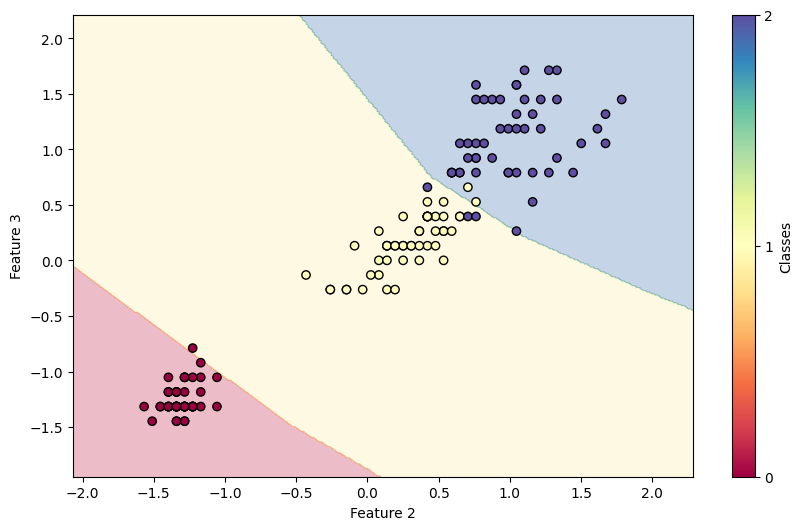

In [41]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, Y, model, feature_idx=(0, 1)):
    i, j = feature_idx
    x_min, x_max = X[:, i].min() - 0.5, X[:, i].max() + 0.5
    y_min, y_max = X[:, j].min() - 0.5, X[:, j].max() + 0.5
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    X_grid = np.tile(np.mean(X, axis=0), (xx.size, 1))
    X_grid[:, i] = xx.ravel()
    X_grid[:, j] = yy.ravel()

    Z_pred = model.predict(X_grid)
    Z = np.argmax(Z_pred, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6)) 
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')
    
    y_labels = np.argmax(Y, axis=1)
    scatter = plt.scatter(X[:, i], X[:, j], c=y_labels, edgecolors='k', cmap='Spectral')
    
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Classes')
    plt.xlabel(f"Feature {i}")
    plt.ylabel(f"Feature {j}")
    plt.show()

# Petal Length (2) и Petal Width (3)
# Именно на этих признаках Iris разделяется лучше всего
plot_decision_boundary(X, Y, nn, feature_idx=(2,3))

## Тесты. Датасет MNIST

In [42]:
from sklearn.datasets import fetch_openml

In [43]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
Y = Y.astype(int)
Y = np.eye(10)[Y]
X[:10], Y[:10]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 784)),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [45]:
mnist_nn = NeuralNetwork(
    [
        Layer(64, "relu"),
        Layer(64, "relu"),
        Layer(10, "softmax")
    ],
    loss = "cce",
    optimizer = AdamOptimizer(learning_rate=0.001)
)

In [46]:
mnist_nn.train(X_train, Y_train, epochs=20, batch_size=256)

Samples 49000
Epoch 0, Loss: 0.5346854325711546
Epoch 1, Loss: 0.20423127619880474
Epoch 2, Loss: 0.15307223232696265
Epoch 3, Loss: 0.123330353240253
Epoch 4, Loss: 0.10341261891153442
Epoch 5, Loss: 0.08917543530785155
Epoch 6, Loss: 0.07720252936181919
Epoch 7, Loss: 0.06682438476248279
Epoch 8, Loss: 0.061083125519701936
Epoch 9, Loss: 0.053743554676093354
Epoch 10, Loss: 0.04603236306281169
Epoch 11, Loss: 0.04206028244271188
Epoch 12, Loss: 0.038617235602022716
Epoch 13, Loss: 0.0348303791937353
Epoch 14, Loss: 0.030569150426634835
Epoch 15, Loss: 0.027108950491136125
Epoch 16, Loss: 0.025198252501337587
Epoch 17, Loss: 0.0226608140099511
Epoch 18, Loss: 0.019645956721819756
Epoch 19, Loss: 0.01763684665819


In [47]:
Y_pred = mnist_nn.predict(X_test)
y_pred_labels = np.argmax(Y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)

print(classification_report(y_pred_labels, y_true_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2074
           1       0.99      0.98      0.99      2393
           2       0.96      0.97      0.97      2122
           3       0.96      0.97      0.97      2145
           4       0.98      0.96      0.97      1971
           5       0.97      0.97      0.97      1906
           6       0.98      0.98      0.98      2087
           7       0.98      0.96      0.97      2291
           8       0.95      0.97      0.96      1967
           9       0.95      0.97      0.96      2044

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000

